In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

### PRE CORRIDA

In [2]:
def ver_dispersion(y_test, prediction, nombre):
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, prediction, alpha=0.2)
    plt.title("Dispersión de " + nombre, fontsize=25)
    plt.ylabel("Predicciones", fontsize=20)
    plt.xlabel("Valores Reales", fontsize=20)
    plt.xticks(rotation=30, fontsize=17, ha="right")
    plt.yticks(fontsize=17)
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    # Recta x = y
    plt.plot([y_test.min(), y_test.max()], [
             y_test.min(), y_test.max()], "k--", lw=4)
    plt.show()
    return None

In [3]:
ruta_data = "../../data"
ruta_train = ruta_data + "../train.csv"
ruta_test = ruta_data + "../test.csv"
ruta_submits = "../..submits"
ruta_features = ruta_data + "../features/"

In [4]:
train_limpio = pd.read_csv(f"{ruta_data}/train_final.csv")
#test_limpio = pd.read_csv(f"{ruta_data}/test_final.csv")

### CORRIDA DE PRUEBA

In [5]:
X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]

In [6]:
scaling = StandardScaler().fit(X)
X2 = scaling.transform(X)
X2 = pd.DataFrame(data = X2, columns = X.columns)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state = 100)

In [8]:
%%time 
y_train_l = np.log(y_train)
reg = MLPRegressor(max_iter = 10000, learning_rate_init = 0.01, activation='logistic')
reg.fit(X_train, y_train_l)

Wall time: 10min 43s


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.01, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
%%time 
pred = reg.predict(X_test)
pred = np.exp(pred)

Wall time: 337 ms


In [10]:
pred2 = pd.DataFrame( pred , columns=["target"])
# Heurística: si vale menos de 310 000, ponerle 310 000
pred2.loc[ pred2['target'] <= 310000, 'target'] = 310000    
# Heurística 2: si vale más de 12 500 000, ponerle 12 500 000
pred2.loc[ pred2['target'] >= 12500000, 'target'] = 12500000

int( round( mean_absolute_error(y_test, pred2) ) )

773715

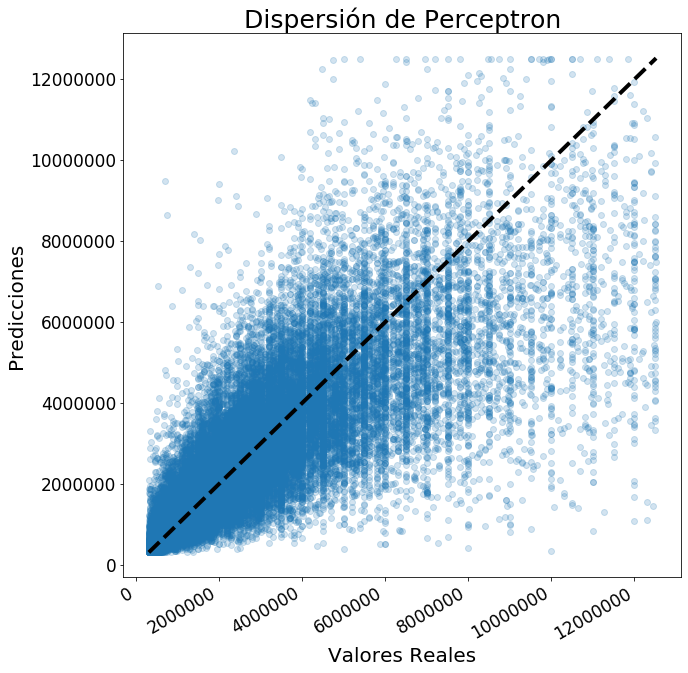

In [13]:
ver_dispersion(y_test, pred2['target'], "Perceptron")

In [12]:
detenerse

NameError: name 'detenerse' is not defined

### CORRIDA DE SUBMIT

In [ ]:
%%time
y_l = np.log(y)
reg = #ACA VA EL TRAIN DEL ALGORITMO CORRESPONDIENTE

In [ ]:
%%time 
pred_test = #ACA VA EL TEST DEL ALGORITMO CORRESPONDIENTE
pred_test = np.exp(pred_test)

In [ ]:
ids_test = pd.read_csv(f"{ruta_data}/ids_test.csv")

ids_test["target"] = pred_test

#### Ponele algun nombre al csv

In [ ]:
ids_test.to_csv(f"{ruta_submits}/linear_regression_final.csv",index=False)